In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Complete code in the relevant places (15 min)**

In [ ]:
# Initialize centroids at the mean of the features values
initial_centroids =  np.mean(X_scaled, axis=0)
initial_centroids =

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, init=initial_centroids, n_init=1, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

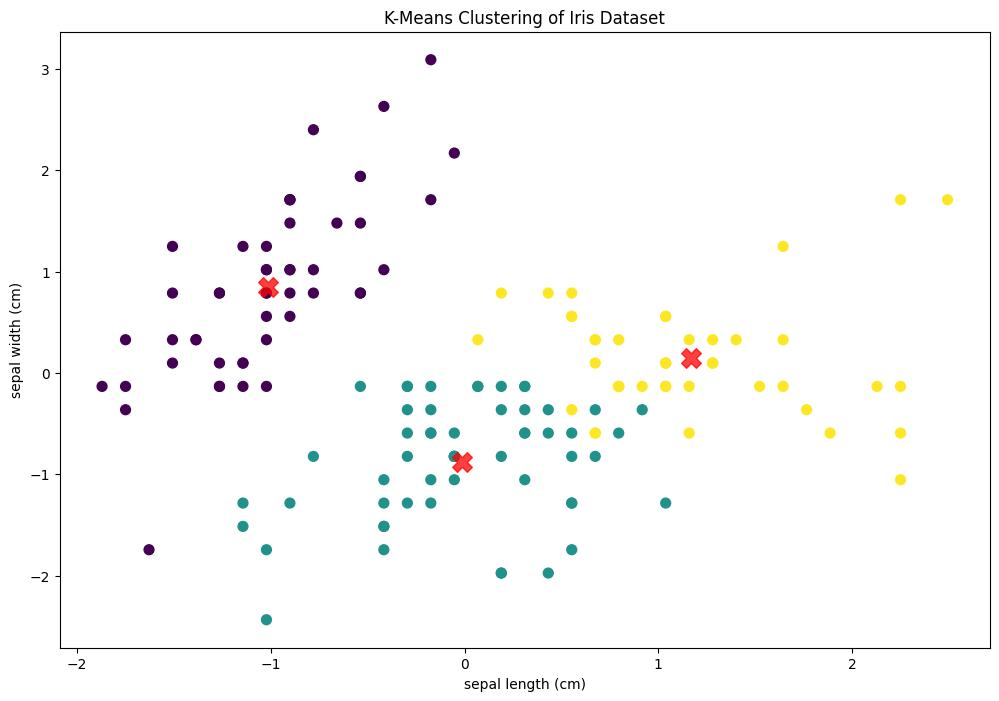

Silhouette Score: 0.4630420362927048
Davies-Bouldin Score: 0.8324162130910141
Dunn Index: 0.04418722234165696
True Accuracy: 0.8133333333333334


In [ ]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering of Iris Dataset")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Score
db_score = davies_bouldin_score(X_scaled, y_kmeans)
print(f"Davies-Bouldin Score: {db_score}")

# Dunn Index
def dunn_index(X, labels):
    distances = squareform(pdist(X))
    unique_labels = np.unique(labels)
    delta = np.inf
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            delta = min(delta, np.min(distances[np.ix_(labels == unique_labels[i], labels == unique_labels[j])]))
    big_delta = np.max([np.max(distances[labels == k]) for k in unique_labels])
    return delta / big_delta

dunn = dunn_index(X_scaled, y_kmeans)
print(f"Dunn Index: {dunn}")

# True Accuracy
def calculate_accuracy(y_true, y_pred):
    contingency_table = pd.crosstab(y_true, y_pred)
    return np.sum(np.amax(contingency_table.values, axis=0)) / np.sum(contingency_table.values)

true_accuracy = calculate_accuracy(y_true, y_kmeans)
print(f"True Accuracy: {true_accuracy}")